In [9]:
# Importing the images

import csv
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

lines = []
with open('C:/SDCND/Project3/mydata/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
correction = 0.2
images = []
measurements = []
for line in lines:
    S = np.array([0, 1, -1])
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        current_path = filename#'C:/SDCND/Project3/mydata/IMG' + filename
        image = mpimg.imread(current_path)
        images.append(image)
        measurement = float(line[3]) + S[i] * correction
        measurements.append(measurement)
    
X_train = np.array(images)
y_train = np.array(measurements)

In [ ]:
# Importing images in AWS
import csv
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = filename#'C:/SDCND/Project3/mydata/IMG' + filename
    image = mpimg.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    
X_train = np.array(images)
y_train = np.array(measurements)

In [11]:
import sys
import os
#print(sys.path)
print(os.environ.get('PYTHONPATH', ''))

(160, 320)


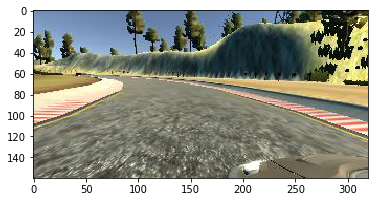

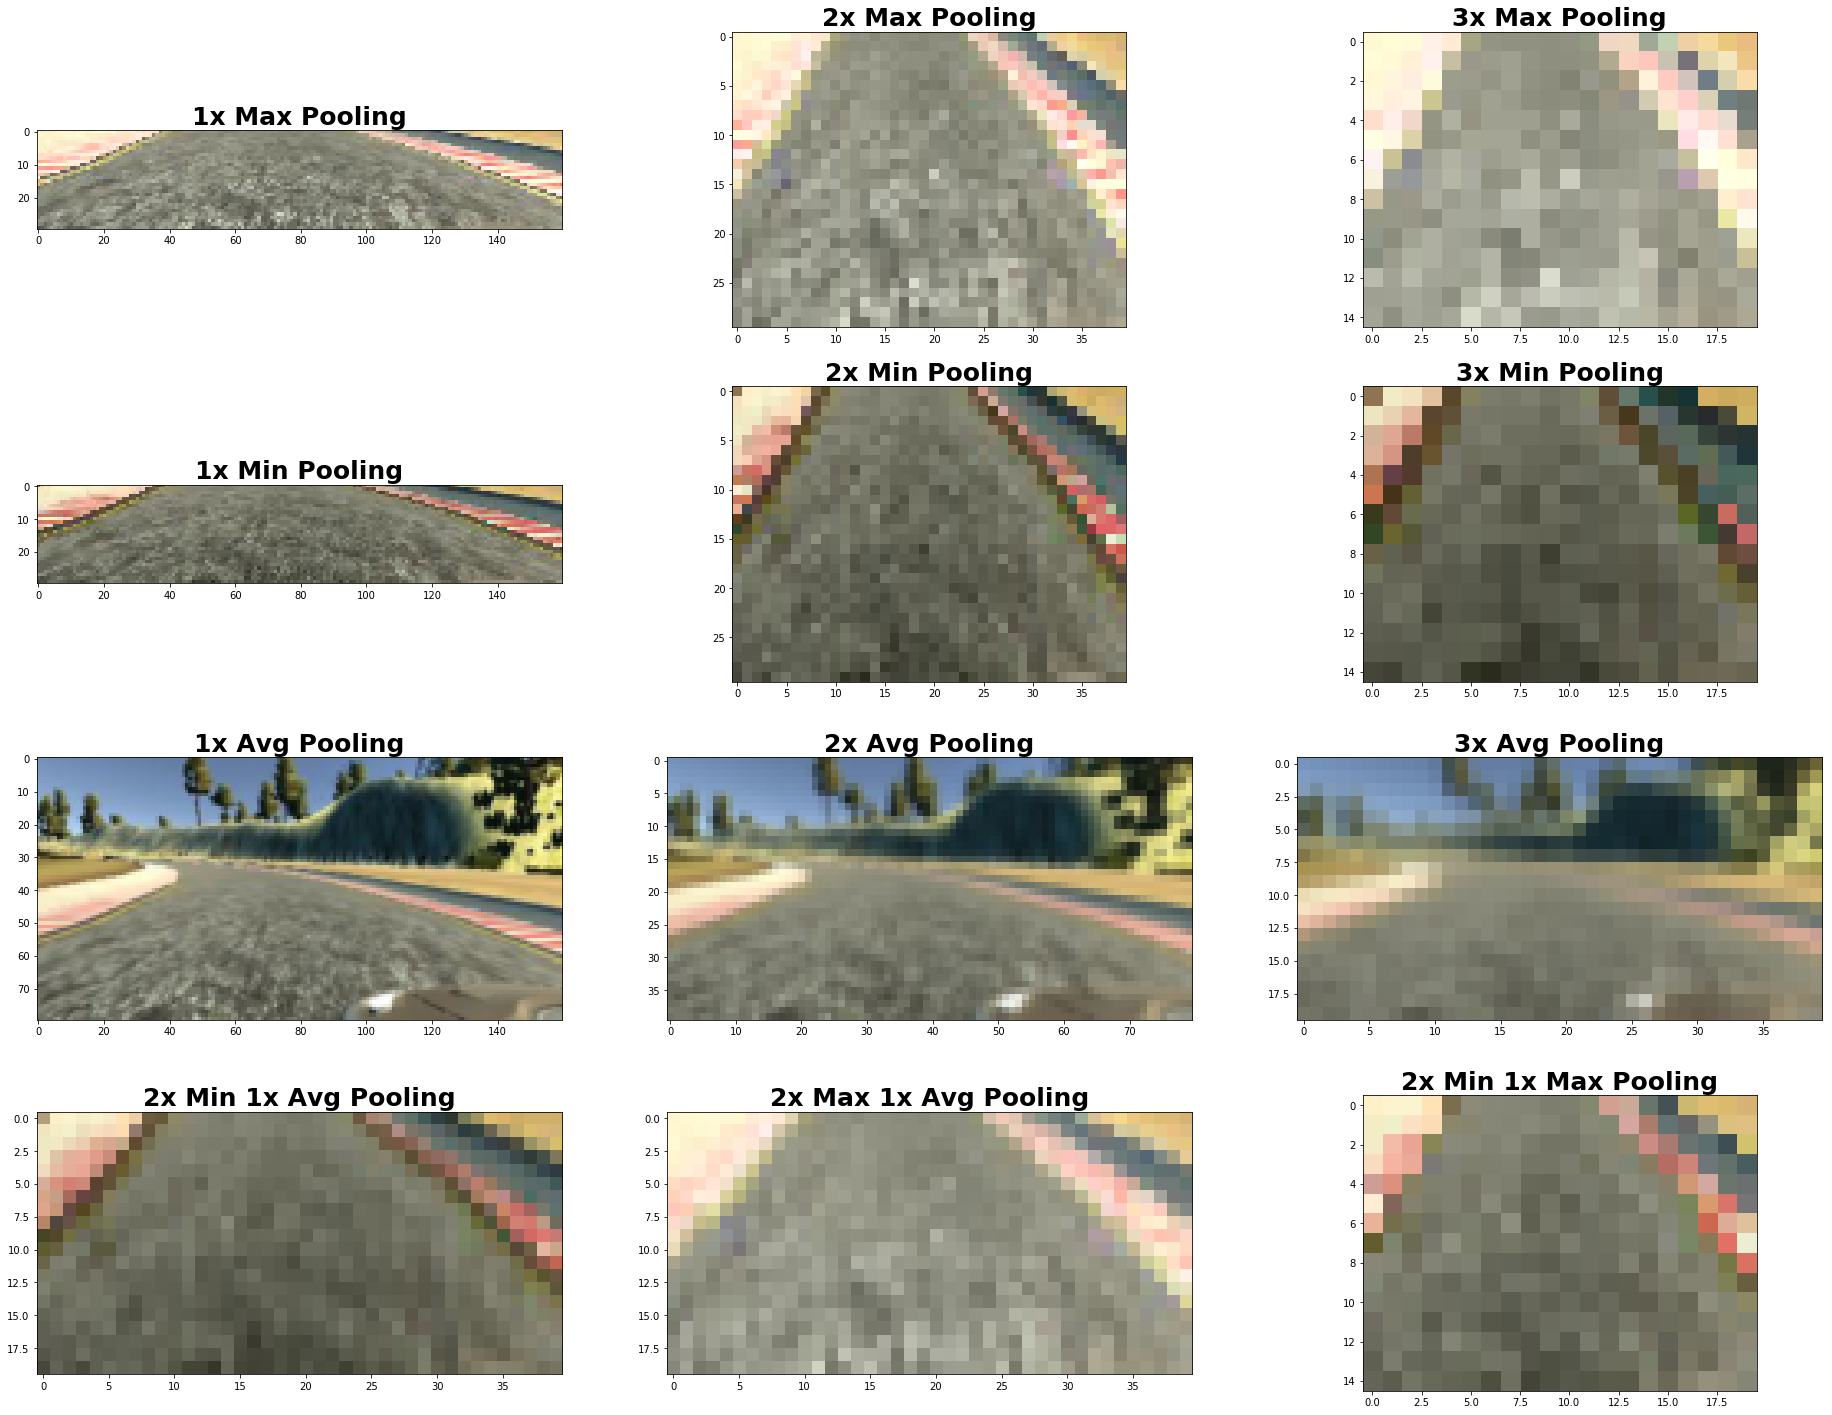

In [41]:
import matplotlib.pyplot as plt
import skimage.measure
import scipy

img_flip_x = np.fliplr(X_train[1])
plt.imshow(X_train[1])
#plt.figure()
#plt.imshow(img_flip_x)
#print(img_flip_x.shape)
print(X_train[1][:,:,0].shape)


# Here, we want to decide how much we can reduce the size of the input without loosing too much information.
# We can see that using a 2x2 max pooling filter one or two times may be a good choice. Using it three times
# leads to an image that might have a resolution that is too low.

a1 = skimage.measure.block_reduce(X_train[1][80:-20,:], (2,2,1), np.max)
a2 = skimage.measure.block_reduce(a1, (1,4,1), np.max)
a3 = skimage.measure.block_reduce(a2, (2,2,1), np.max)
b1 = skimage.measure.block_reduce(X_train[1][80:-20,:], (2,2,1), np.min)
b2 = skimage.measure.block_reduce(b1, (1,4,1), np.min)
b3 = skimage.measure.block_reduce(b2, (2,2,1), np.min)
c1 = scipy.misc.imresize(X_train[1], (80,160,3))
c2 = scipy.misc.imresize(c1, (40,80,3))
c3 = scipy.misc.imresize(c2, (20,40,3))
d1 = scipy.misc.imresize(b2, (20,40,3))
d2 = scipy.misc.imresize(a2, (20,40,3))
d3 = skimage.measure.block_reduce(b2, (2,2,1), np.max)

fig, sub_fig = plt.subplots(4,3, figsize = (32,25))
sub_fig[0,0].set_title('1x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,0].imshow(a1)
sub_fig[0,1].set_title('2x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,1].imshow(a2)
sub_fig[0,2].set_title('3x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,2].imshow(a3)
sub_fig[1,0].set_title('1x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,0].imshow(b1)
sub_fig[1,1].set_title('2x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,1].imshow(b2)
sub_fig[1,2].set_title('3x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,2].imshow(b3)
sub_fig[2,0].set_title('1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,0].imshow(c1)
sub_fig[2,1].set_title('2x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,1].imshow(c2)
sub_fig[2,2].set_title('3x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,2].imshow(c3)
sub_fig[3,0].set_title('2x Min 1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[3,0].imshow(d1)
sub_fig[3,1].set_title('2x Max 1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[3,1].imshow(d2)
sub_fig[3,2].set_title('2x Min 1x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[3,2].imshow(d3)



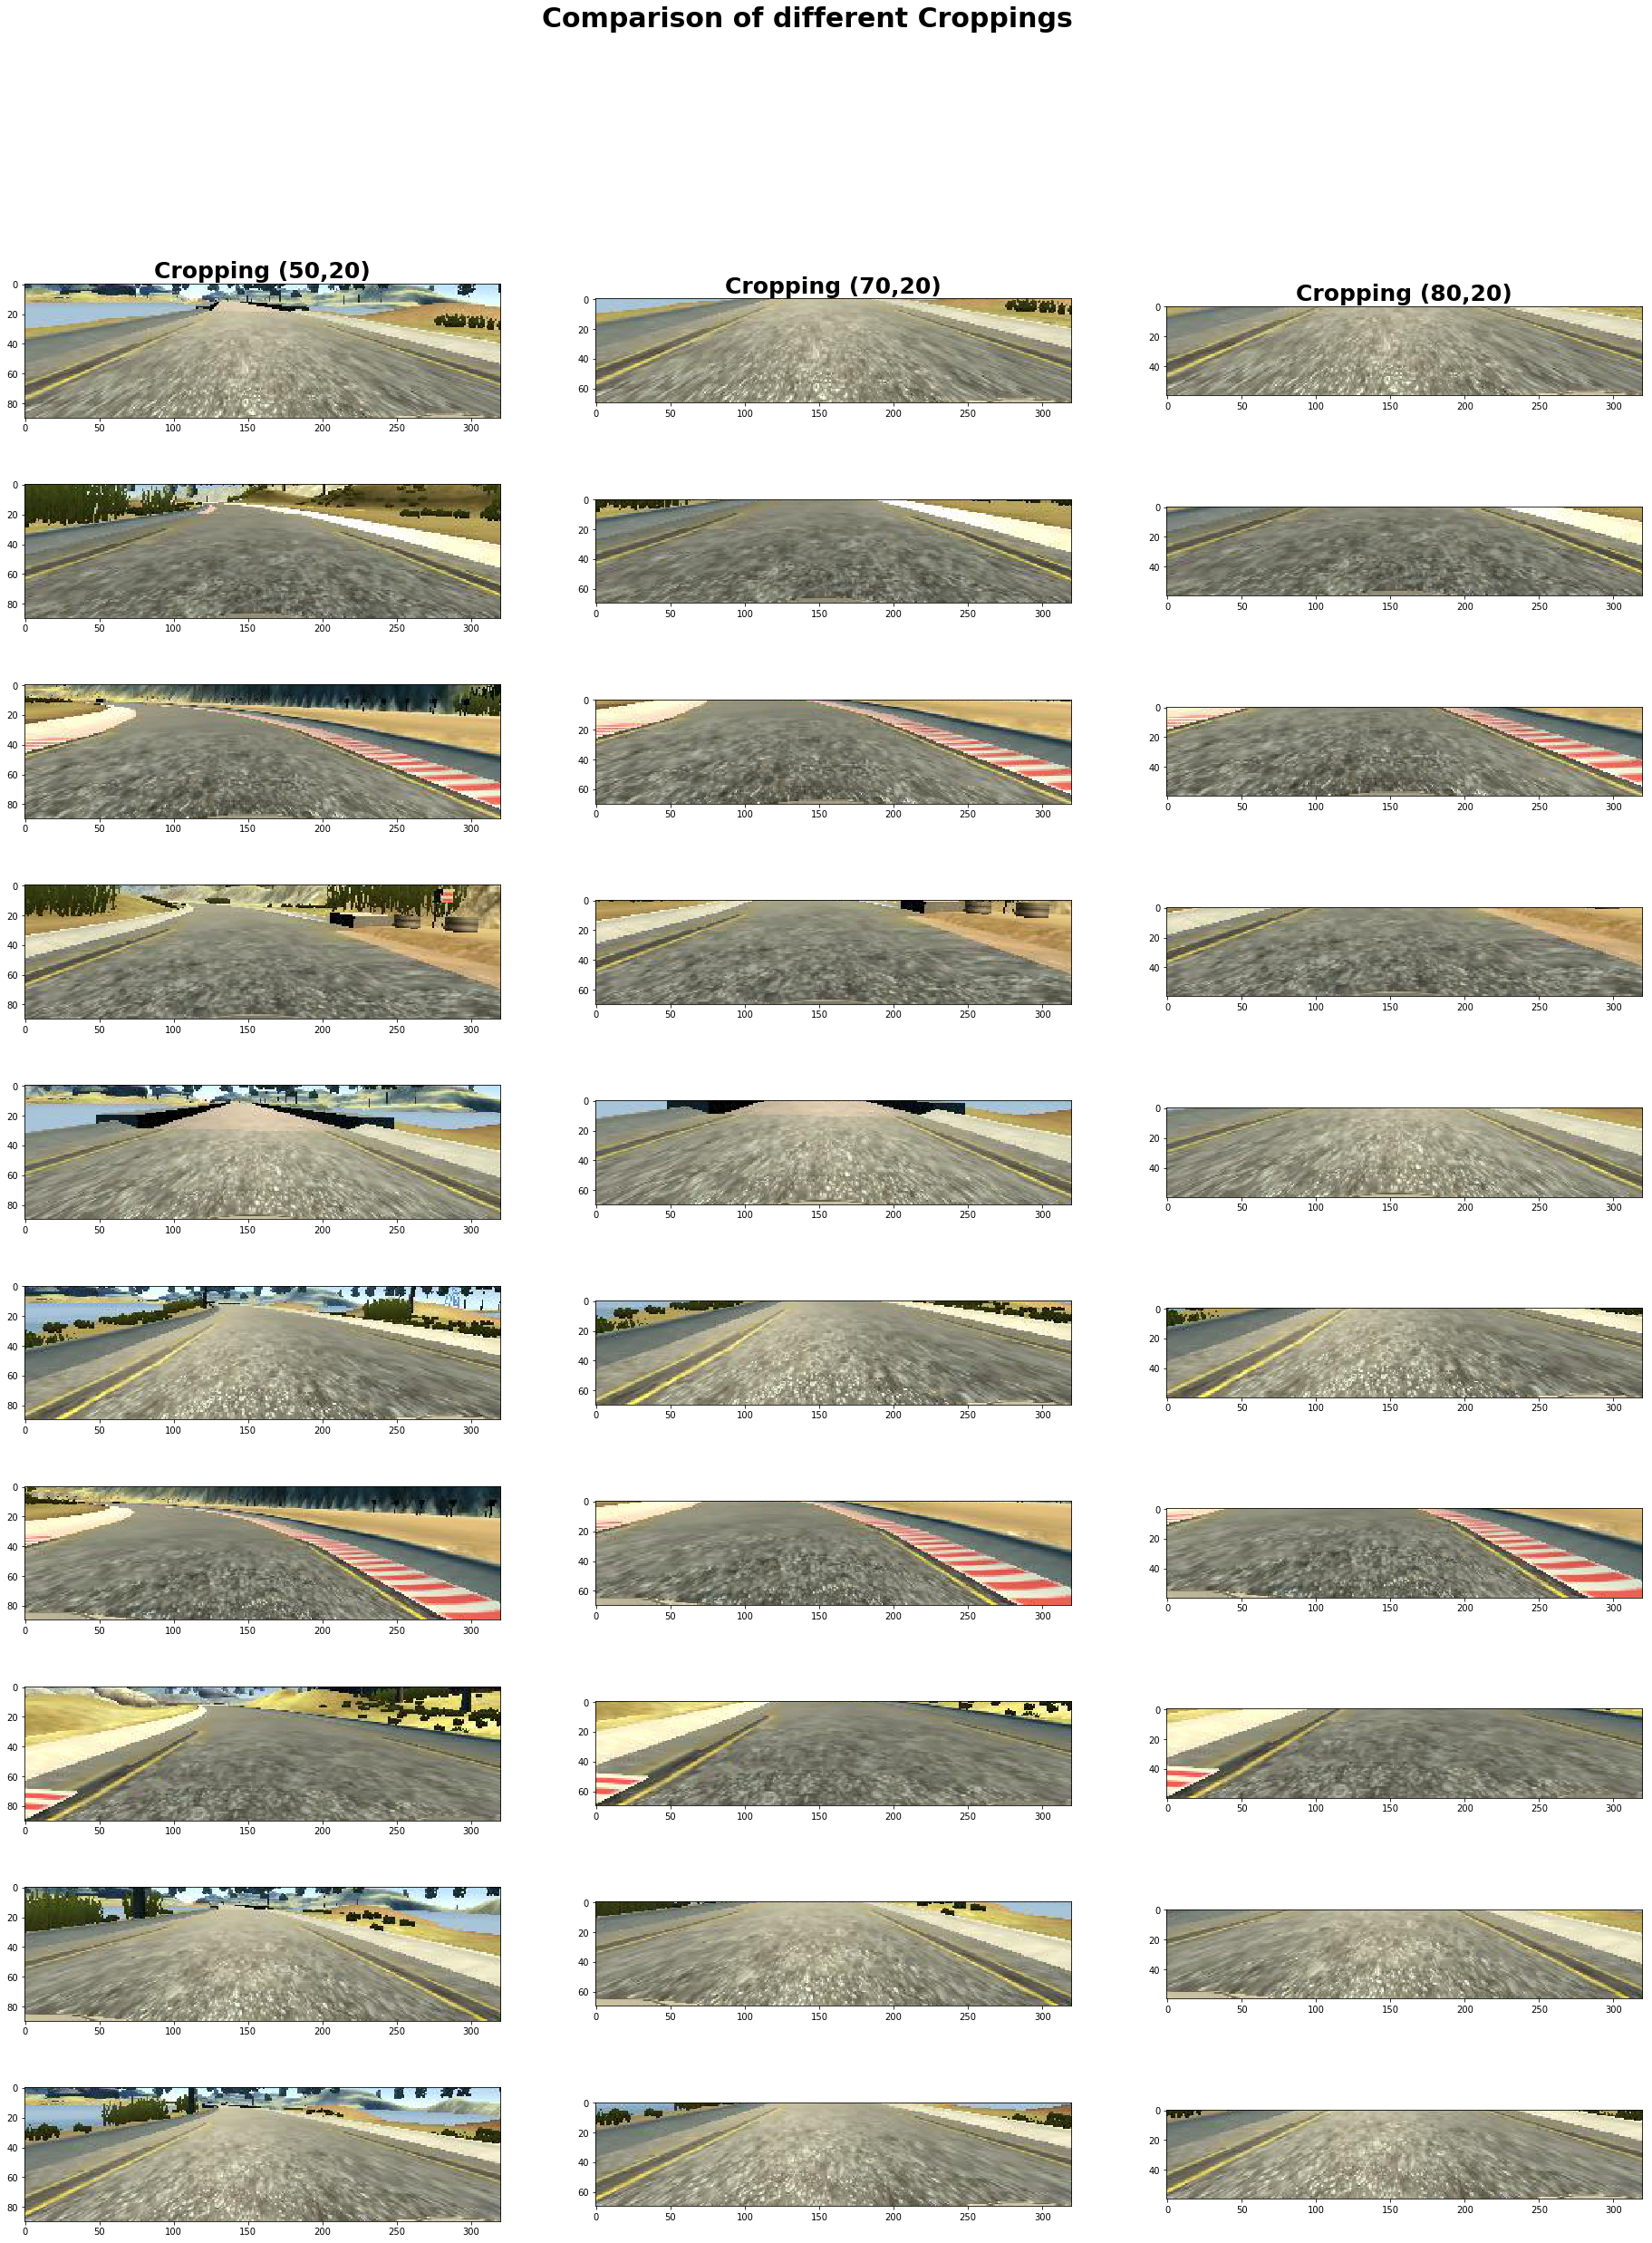

In [34]:
fig, sub_fig = plt.subplots(10,3, figsize = (32,40))
for i in range(10):
    k = np.random.randint(3000)
    sub_fig[i,2].imshow(X_train[k][80:-20,:])
    sub_fig[i,1].imshow(X_train[k][70:-20,:])
    sub_fig[i,0].imshow(X_train[k][50:-20,:])
fig.suptitle('Comparison of different Croppings', fontsize=30, fontweight='bold')
sub_fig[0,2].set_title('Cropping (80,20)', fontsize=25, fontweight='bold')
sub_fig[0,1].set_title('Cropping (70,20)', fontsize=25, fontweight='bold')
sub_fig[0,0].set_title('Cropping (50,20)', fontsize=25, fontweight='bold')

In [4]:
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)

In [5]:
# Generator
import sklearn
import os
from random import shuffle

def generator(samples, batch_size = 32):
    num_samples = len(samples)
    while 1:
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            
            images = []
            angles = []
            for batch_sample in batch_samples:
                name = batch_sample[0].split('/')[-1] #'./IMG/' + batch_sample[0].split('/')[-1]
                center_image = mpimg.imread(name)
                center_image_flipped = np.fliplr(center_image)
                center_angle = float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
                images.append(center_image_flipped)
                angles.append(- center_angle)
                
            X_train = np.array(images)
            y_train = np.array(angles)

            yield sklearn.utils.shuffle(X_train, y_train)


In [6]:
train_generator = generator(train_samples, batch_size = 32)
validation_generator = generator(validation_samples, batch_size = 32)

data_increse_factor = 2

In [ ]:
# Building and Training the model

from keras.models import Sequential
#from keras.layers import Flatten, Dense, Convolution2D
#from keras import *
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Lambda, Flatten, Dense, Reshape, Input, merge
from keras.models import Model

inp = Input(shape=(160,320,3))
layer_1  = Lambda(lambda x: x/127.5 - 1)(inp)
layer_2  = Lambda(lambda x: -x)(layer_1)
layer_3  = MaxPooling2D()(layer_2)
layer_4  = MaxPooling2D()(layer_3)
layer_5  = Lambda(lambda x: -x)(layer_4)
conv1    = Conv2D(400,3,3, border_mode='same')(layer_5)
conv2    = Conv2D(20,1,1, border_mode='same')(layer_5)
merge1   = merge([conv1, conv2], mode = 'concat', concat_axis = -1)
layer_6  = MaxPooling2D()(merge1)
layer_7  = Dropout(0.5)(layer_6)
layer_8  = Conv2D(50,3,3, border_mode='same')(layer_7)
layer_9  = Dropout(0.5)(layer_8)
layer_10 = MaxPooling2D()(layer_9)
layer_10b= Conv2D(20,3,3, border_mode='same')(layer_10)
layer_11 = Flatten()(layer_10b)
layer_12 = Dropout(0.5)(layer_11)
layer_13 = Dense(200)(layer_12)
layer_14 = Dropout(0.5)(layer_13)
layer_15 = Dense(100)(layer_14)
outlayer = Dense(1)(layer_15)

model = model = Model(input=inp, output=outlayer)
model.summary()
''' 
model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1, input_shape=(160,320,3)))
model.add(Lambda(lambda x: -x))
model.add(MaxPooling2D())
model.add(MaxPooling2D())
model.add(Lambda(lambda x: -x))
mode.add(Conv2D(400,3,3, border_mode='same'))
model.add(Conv2D(20,1,1, border_mode='same'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(200,3,3, border_mode='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(Dense(100))
model.add(Dense(1))
'''

model.compile(loss = 'mse', optimizer='adam')
#history_object = model.fit(X_train, y_train, validation_split=0.2, shuffle = True, nb_epoch = 7)
#history_object = model.fit_generator(train_generator, samples_per_epoch = data_increse_factor * len(train_samples), validation_data = validation_generator, nb_val_samples = data_increse_factor * len(validation_samples), nb_epoch = 3)
checkpointer = callbacks.ModelCheckpoint(filepath='C:/SDCND/CarND-Behavioral-Cloning-P3/tmp/weights.hdf5', verbose=1, save_best_only=True)
history_object = model.fit_generator(train_generator, samples_per_epoch = 2*len(train_samples), validation_data = validation_generator, nb_val_samples = 2*len(validation_samples), nb_epoch = 2, callbacks=[checkpointer])


model.save('model.h5')


print(history_object.history.keys())

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

plt.plot(history_object.history['loss'][2:])
plt.plot(history_object.history['val_loss'][2:])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_27 (InputLayer)            (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
lambda_85 (Lambda)               (None, 160, 320, 3)   0           input_27[0][0]                   
____________________________________________________________________________________________________
lambda_86 (Lambda)               (None, 160, 320, 3)   0           lambda_85[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_75 (MaxPooling2D)   (None, 80, 160, 3)    0           lambda_86[0][0]                  
___________________________________________________________________________________________

In [6]:
from keras import *
from keras.models import load_model

model_x = load_model('./mymodel_all_5.hdf5')
model_x.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
lambda_12 (Lambda)               (None, 160, 320, 3)   0           input_6[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_17 (MaxPooling2D)   (None, 80, 160, 3)    0           lambda_12[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_18 (MaxPooling2D)   (None, 40, 80, 3)     0           maxpooling2d_17[0][0]            
___________________________________________________________________________________________

In [2]:
%run -p video.py Track2_final

Creating video Track2_final.mp4, FPS=60
[MoviePy] >>>> Building video Track2_final.mp4
[MoviePy] Writing video Track2_final.mp4


100%|█████████████████████████████████████| 7568/7568 [00:32<00:00, 236.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Track2_final.mp4 

 